important 変数を個々に定義する

In [1]:
SensorNum=4# Sensor number
SampleNum=16 # Window Width
Overlap=0.5 # overlap
width=3000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccX' # Axis

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l1,l2,l1l2,activity_l1,activity_l2,activity_l1l2
import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-18'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
w=window.Window()
w.SetData(Axis,dic[Axis])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccX is registed now
Build Complete
(254742,)


In [8]:
windoW.shape

(15921, 16)

**前回やった学習をもう１度やってみる  
今回は、正則化をする  
使用するものはl1( L1 weight regularization penalty, also known as LASSO )  
実際、どのくらいの重みにすればいいのかわからないので色々試してみる  **

In [9]:
ParameterL1=[0.01,0.1,0.3,0.5,0.7,0.9]

L1 parameter is 0.01
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 207s - loss: 0.0721 - val_loss: 0.0052
Epoch 2/50
15921/15921 [==============================] - 217s - loss: 0.0118 - val_loss: 0.0022
Epoch 3/50
15921/15921 [==============================] - 137s - loss: 0.0054 - val_loss: 0.0014
Epoch 4/50
15921/15921 [==============================] - 18s - loss: 0.0025 - val_loss: 5.7374e-04
Epoch 5/50
15921/15921 [==============================] - 20s - loss: 0.0019 - val_loss: 3.5836e-04
Epoch 6/50
15921/15921 [==============================] - 20s - loss: 0.0017 - val_loss: 3.8937e-04
Epoch 7/50
15921/15921 [==============================] - 20s - loss: 0.0016 - val_loss: 2.7791e-04
Epoch 8/50
15921/15921 [==============================] - 19s - loss: 0.0016 - val_loss: 2.5604e-04
Epoch 9/50
15921/15921 [==============================] - 20s - loss: 0.0016 - val_loss: 2.1062e-04
Epoch 10/50
15921/15921 [=============

/home/takeyama/.pyenv/versions/takeyama/lib/python2.7/site-packages/keras/backend/theano_backend.py:514: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 1 is not part of the computational graph needed to compute the outputs: keras_learning_phase.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  **kwargs)


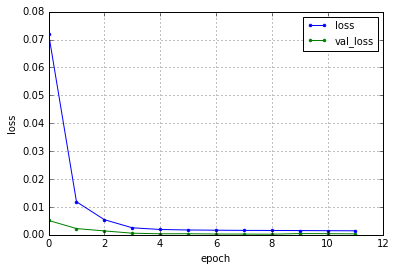

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.0655 - val_loss: 0.0056
Epoch 2/50
15921/15921 [==============================] - 19s - loss: 0.0139 - val_loss: 0.0021
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0066 - val_loss: 6.3788e-04
Epoch 4/50
15921/15921 [==============================] - 20s - loss: 0.0032 - val_loss: 3.5010e-04
Epoch 5/50
15921/15921 [==============================] - 20s - loss: 0.0024 - val_loss: 4.6383e-04
Epoch 6/50
15921/15921 [==============================] - 20s - loss: 0.0022 - val_loss: 0.0017
Epoch 7/50
15921/15921 [==============================] - 19s - loss: 0.0021 - val_loss: 3.0122e-04
Epoch 8/50
15921/15921 [==============================] - 20s - loss: 0.0020 - val_loss: 3.3648e-04
Epoch 9/50
15921/15921 [==============================] - 20s - loss: 0.0019 - val_loss: 1.9609e-04
Epoch 10/50
15921/15921 [==============================] - 20s

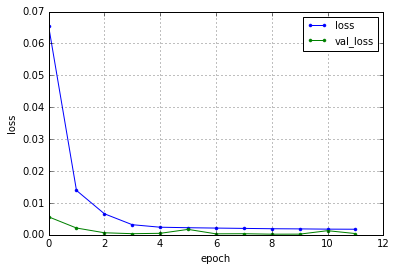

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.0630 - val_loss: 0.0032
Epoch 2/50
15921/15921 [==============================] - 20s - loss: 0.0107 - val_loss: 0.0011
Epoch 3/50
15921/15921 [==============================] - 19s - loss: 0.0052 - val_loss: 5.7577e-04
Epoch 4/50
15921/15921 [==============================] - 20s - loss: 0.0030 - val_loss: 2.4953e-04
Epoch 5/50
15921/15921 [==============================] - 20s - loss: 0.0026 - val_loss: 2.9274e-04
Epoch 6/50
15921/15921 [==============================] - 20s - loss: 0.0025 - val_loss: 0.0012
Epoch 7/50
15921/15921 [==============================] - 20s - loss: 0.0024 - val_loss: 5.2212e-04


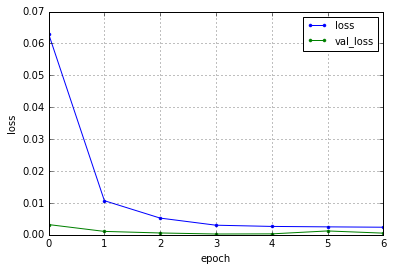

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.0507 - val_loss: 0.0032
Epoch 2/50
15921/15921 [==============================] - 20s - loss: 0.0099 - val_loss: 9.5397e-04
Epoch 3/50
15921/15921 [==============================] - 19s - loss: 0.0061 - val_loss: 6.7814e-04
Epoch 4/50
15921/15921 [==============================] - 20s - loss: 0.0039 - val_loss: 6.8408e-04
Epoch 5/50
15921/15921 [==============================] - 19s - loss: 0.0029 - val_loss: 5.3852e-04
Epoch 6/50
15921/15921 [==============================] - 19s - loss: 0.0027 - val_loss: 9.2147e-04
Epoch 7/50
15921/15921 [==============================] - 20s - loss: 0.0026 - val_loss: 1.7207e-04
Epoch 8/50
15921/15921 [==============================] - 19s - loss: 0.0025 - val_loss: 2.0068e-04
Epoch 9/50
15921/15921 [==============================] - 20s - loss: 0.0024 - val_loss: 3.3431e-04
Epoch 10/50
15921/15921 [=============================

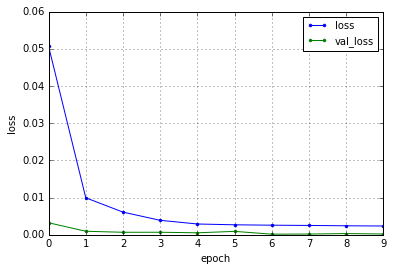

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 19s - loss: 0.0546 - val_loss: 5.9726e-04
Epoch 2/50
15921/15921 [==============================] - 20s - loss: 0.0088 - val_loss: 6.8242e-04
Epoch 3/50
15921/15921 [==============================] - 19s - loss: 0.0049 - val_loss: 3.5212e-04
Epoch 4/50
15921/15921 [==============================] - 20s - loss: 0.0045 - val_loss: 0.0017
Epoch 5/50
15921/15921 [==============================] - 20s - loss: 0.0044 - val_loss: 1.8672e-04
Epoch 6/50
15921/15921 [==============================] - 20s - loss: 0.0044 - val_loss: 0.0016
Epoch 7/50
15921/15921 [==============================] - 19s - loss: 0.0043 - val_loss: 4.2085e-04
Epoch 8/50
15921/15921 [==============================] - 19s - loss: 0.0043 - val_loss: 6.8455e-04


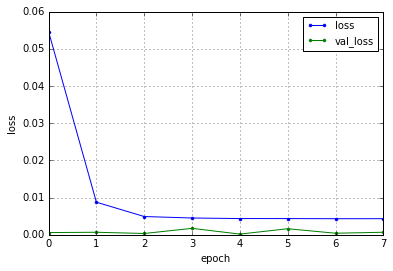

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 154s - loss: 0.0504 - val_loss: 0.0016
Epoch 2/50
15921/15921 [==============================] - 220s - loss: 0.0108 - val_loss: 9.3641e-04
Epoch 3/50
15921/15921 [==============================] - 209s - loss: 0.0076 - val_loss: 5.5389e-04
Epoch 4/50
15921/15921 [==============================] - 220s - loss: 0.0074 - val_loss: 7.7112e-04
Epoch 5/50
15921/15921 [==============================] - 241s - loss: 0.0075 - val_loss: 0.0028
Epoch 6/50
15921/15921 [==============================] - 327s - loss: 0.0077 - val_loss: 0.0020


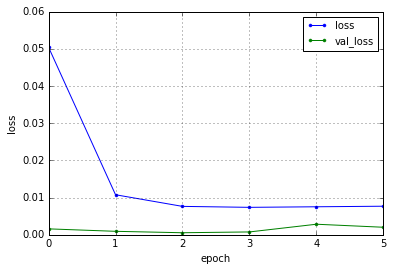

L1 parameter is 0.1
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 321s - loss: 0.1756 - val_loss: 0.0144
Epoch 2/50
15921/15921 [==============================] - 323s - loss: 0.0193 - val_loss: 0.0028
Epoch 3/50
15921/15921 [==============================] - 316s - loss: 0.0132 - val_loss: 0.0014
Epoch 4/50
15921/15921 [==============================] - 321s - loss: 0.0111 - val_loss: 0.0013
Epoch 5/50
15921/15921 [==============================] - 312s - loss: 0.0100 - val_loss: 0.0021
Epoch 6/50
15921/15921 [==============================] - 324s - loss: 0.0093 - val_loss: 0.0011
Epoch 7/50
15921/15921 [==============================] - 313s - loss: 0.0087 - val_loss: 9.9269e-04
Epoch 8/50
15921/15921 [==============================] - 324s - loss: 0.0082 - val_loss: 8.6889e-04
Epoch 9/50
15921/15921 [==============================] - 312s - loss: 0.0079 - val_loss: 8.1264e-04
Epoch 10/50
15921/15921 [====================

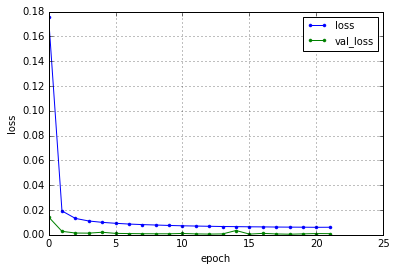

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 212s - loss: 0.1540 - val_loss: 0.0097
Epoch 2/50
15921/15921 [==============================] - 197s - loss: 0.0195 - val_loss: 0.0020
Epoch 3/50
15921/15921 [==============================] - 211s - loss: 0.0153 - val_loss: 0.0027
Epoch 4/50
15921/15921 [==============================] - 198s - loss: 0.0135 - val_loss: 0.0012
Epoch 5/50
15921/15921 [==============================] - 212s - loss: 0.0123 - val_loss: 0.0014
Epoch 6/50
15921/15921 [==============================] - 199s - loss: 0.0115 - val_loss: 0.0010
Epoch 7/50
15921/15921 [==============================] - 212s - loss: 0.0111 - val_loss: 9.1989e-04
Epoch 8/50
15921/15921 [==============================] - 207s - loss: 0.0106 - val_loss: 0.0010
Epoch 9/50
15921/15921 [==============================] - 205s - loss: 0.0104 - val_loss: 0.0021
Epoch 10/50
15921/15921 [==============================] - 211s - loss: 0

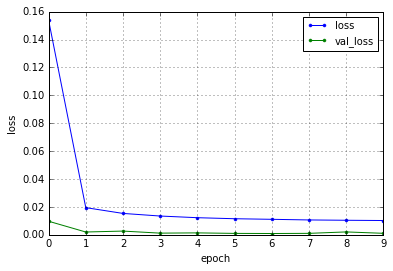

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 201s - loss: 0.1576 - val_loss: 0.0081
Epoch 2/50
15921/15921 [==============================] - 212s - loss: 0.0242 - val_loss: 0.0017
Epoch 3/50
15921/15921 [==============================] - 189s - loss: 0.0187 - val_loss: 0.0014
Epoch 4/50
15921/15921 [==============================] - 212s - loss: 0.0167 - val_loss: 0.0014
Epoch 5/50
15921/15921 [==============================] - 200s - loss: 0.0158 - val_loss: 0.0016
Epoch 6/50
15921/15921 [==============================] - 211s - loss: 0.0151 - val_loss: 0.0011
Epoch 7/50
15921/15921 [==============================] - 198s - loss: 0.0145 - val_loss: 0.0013
Epoch 8/50
15921/15921 [==============================] - 211s - loss: 0.0141 - val_loss: 0.0016
Epoch 9/50
15921/15921 [==============================] - 198s - loss: 0.0140 - val_loss: 7.2894e-04
Epoch 10/50
15921/15921 [==============================] - 212s - loss: 0

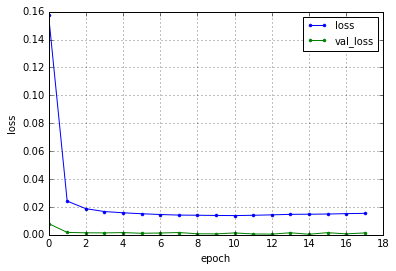

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 209s - loss: 0.1476 - val_loss: 0.0082
Epoch 2/50
15921/15921 [==============================] - 199s - loss: 0.0245 - val_loss: 0.0021
Epoch 3/50
15921/15921 [==============================] - 211s - loss: 0.0202 - val_loss: 0.0019
Epoch 4/50
15921/15921 [==============================] - 198s - loss: 0.0189 - val_loss: 0.0018
Epoch 5/50
15921/15921 [==============================] - 211s - loss: 0.0179 - val_loss: 0.0015
Epoch 6/50
15921/15921 [==============================] - 197s - loss: 0.0176 - val_loss: 0.0025
Epoch 7/50
15921/15921 [==============================] - 211s - loss: 0.0171 - val_loss: 0.0012
Epoch 8/50
15921/15921 [==============================] - 174s - loss: 0.0169 - val_loss: 0.0015
Epoch 9/50
15921/15921 [==============================] - 129s - loss: 0.0168 - val_loss: 0.0016
Epoch 10/50
15921/15921 [==============================] - 210s - loss: 0.016

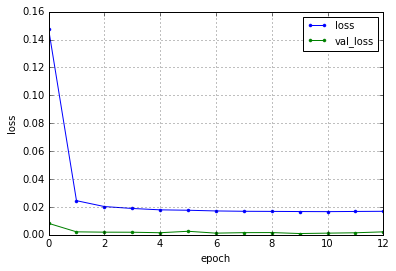

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 213s - loss: 0.1730 - val_loss: 0.0033
Epoch 2/50
15921/15921 [==============================] - 172s - loss: 0.0355 - val_loss: 0.0017
Epoch 3/50
15921/15921 [==============================] - 207s - loss: 0.0338 - val_loss: 0.0021
Epoch 4/50
15921/15921 [==============================] - 198s - loss: 0.0338 - val_loss: 0.0014
Epoch 5/50
15921/15921 [==============================] - 209s - loss: 0.0341 - val_loss: 0.0016
Epoch 6/50
15921/15921 [==============================] - 211s - loss: 0.0344 - val_loss: 0.0019
Epoch 7/50
15921/15921 [==============================] - 202s - loss: 0.0343 - val_loss: 0.0034


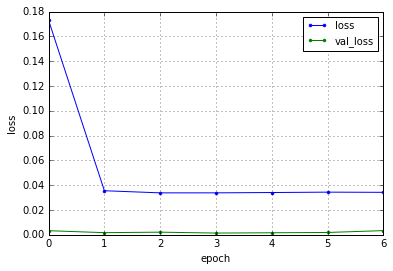

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 212s - loss: 0.1880 - val_loss: 0.0037
Epoch 2/50
15921/15921 [==============================] - 200s - loss: 0.0635 - val_loss: 0.0026
Epoch 3/50
15921/15921 [==============================] - 212s - loss: 0.0688 - val_loss: 0.0014
Epoch 4/50
15921/15921 [==============================] - 202s - loss: 0.0729 - val_loss: 0.0024
Epoch 5/50
15921/15921 [==============================] - 211s - loss: 0.0758 - val_loss: 0.0012
Epoch 6/50
15921/15921 [==============================] - 200s - loss: 0.0792 - val_loss: 0.0010
Epoch 7/50
15921/15921 [==============================] - 212s - loss: 0.0818 - val_loss: 0.0011
Epoch 8/50
15921/15921 [==============================] - 199s - loss: 0.0848 - val_loss: 0.0014
Epoch 9/50
15921/15921 [==============================] - 212s - loss: 0.0865 - val_loss: 0.0018


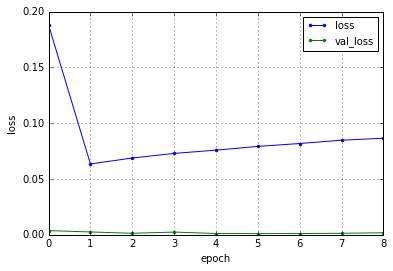

L1 parameter is 0.3
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 198s - loss: 0.2239 - val_loss: 0.0380
Epoch 2/50
15921/15921 [==============================] - 212s - loss: 0.0480 - val_loss: 0.0365
Epoch 3/50
15921/15921 [==============================] - 199s - loss: 0.0450 - val_loss: 0.0311
Epoch 4/50
15921/15921 [==============================] - 211s - loss: 0.0388 - val_loss: 0.0184
Epoch 5/50
15921/15921 [==============================] - 204s - loss: 0.0307 - val_loss: 0.0072
Epoch 6/50
15921/15921 [==============================] - 207s - loss: 0.0258 - val_loss: 0.0044
Epoch 7/50
15921/15921 [==============================] - 211s - loss: 0.0231 - val_loss: 0.0037
Epoch 8/50
15921/15921 [==============================] - 201s - loss: 0.0214 - val_loss: 0.0035
Epoch 9/50
15921/15921 [==============================] - 212s - loss: 0.0203 - val_loss: 0.0030
Epoch 10/50
15921/15921 [==============================] 

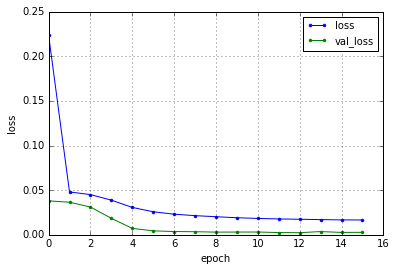

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 212s - loss: 0.2505 - val_loss: 0.0376
Epoch 2/50
15921/15921 [==============================] - 180s - loss: 0.0607 - val_loss: 0.0359
Epoch 3/50
15921/15921 [==============================] - 25s - loss: 0.0547 - val_loss: 0.0317
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0487 - val_loss: 0.0192
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0411 - val_loss: 0.0109
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0360 - val_loss: 0.0064
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0331 - val_loss: 0.0055
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0311 - val_loss: 0.0055
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0298 - val_loss: 0.0046
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0288 - val_

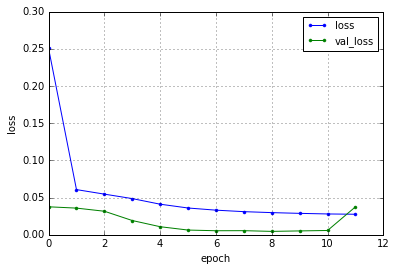

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.2337 - val_loss: 0.0164
Epoch 2/50
15921/15921 [==============================] - 13s - loss: 0.0608 - val_loss: 0.0067
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0463 - val_loss: 0.0035
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0414 - val_loss: 0.0035
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0398 - val_loss: 0.0027
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0393 - val_loss: 0.0033
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0391 - val_loss: 0.0032
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0393 - val_loss: 0.0024
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0393 - val_loss: 0.0025
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0400 - val_lo

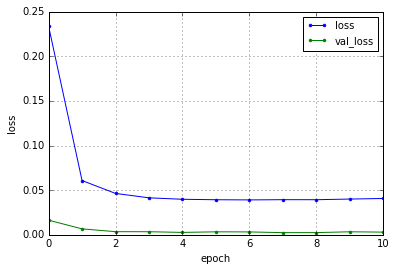

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.2883 - val_loss: 0.0200
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0718 - val_loss: 0.0094
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0561 - val_loss: 0.0058
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0535 - val_loss: 0.0037
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0536 - val_loss: 0.0032
Epoch 6/50
15921/15921 [==============================] - 13s - loss: 0.0535 - val_loss: 0.0036
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0537 - val_loss: 0.0033
Epoch 8/50
15921/15921 [==============================] - 13s - loss: 0.0539 - val_loss: 0.0036


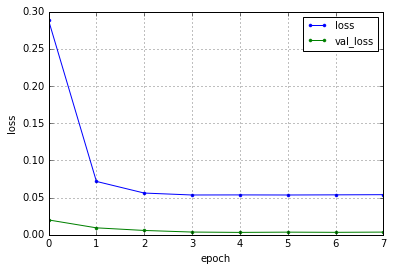

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.3123 - val_loss: 0.0164
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1040 - val_loss: 0.0063
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0970 - val_loss: 0.0034
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0996 - val_loss: 0.0045
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.1037 - val_loss: 0.0030
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.1079 - val_loss: 0.0043
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.1120 - val_loss: 0.0032
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.1139 - val_loss: 0.0027
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.1173 - val_loss: 0.0031
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.1184 - val_lo

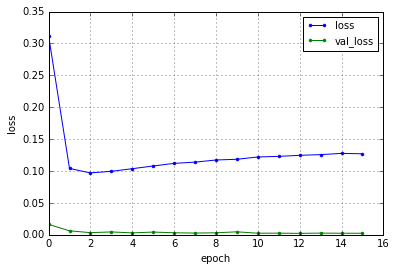

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.4399 - val_loss: 0.0305
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1843 - val_loss: 0.0208
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1801 - val_loss: 0.0129
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.1838 - val_loss: 0.0194
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.1930 - val_loss: 0.0227
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.2073 - val_loss: 0.0072
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.2186 - val_loss: 0.0064
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.2303 - val_loss: 0.0033
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.2380 - val_loss: 0.0039
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.2469 - val_lo

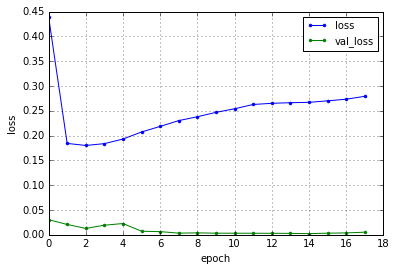

L1 parameter is 0.5
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.2146 - val_loss: 0.0384
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0576 - val_loss: 0.0391
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0564 - val_loss: 0.0385
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0547 - val_loss: 0.0345
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0511 - val_loss: 0.0269
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0453 - val_loss: 0.0156
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0398 - val_loss: 0.0086
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0360 - val_loss: 0.0077
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0335 - val_loss: 0.0050
Epoch 10/50
15921/15921 [==============================] - 13s - l

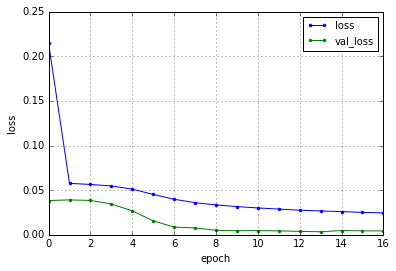

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.2716 - val_loss: 0.0364
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0864 - val_loss: 0.0355
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0729 - val_loss: 0.0327
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0658 - val_loss: 0.0268
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0607 - val_loss: 0.0195
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0555 - val_loss: 0.0123
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0513 - val_loss: 0.0096
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0481 - val_loss: 0.0089
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0460 - val_loss: 0.0052
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0445 - val_lo

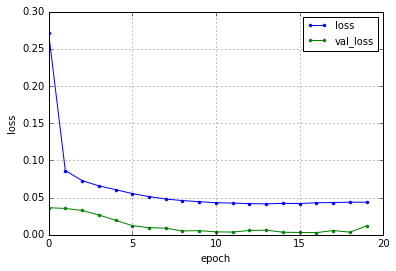

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.3098 - val_loss: 0.0359
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0897 - val_loss: 0.0336
Epoch 3/50
15921/15921 [==============================] - 13s - loss: 0.0767 - val_loss: 0.0298
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0721 - val_loss: 0.0215
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0671 - val_loss: 0.0127
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0635 - val_loss: 0.0103
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0613 - val_loss: 0.0072
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0604 - val_loss: 0.0059
Epoch 9/50
15921/15921 [==============================] - 13s - loss: 0.0588 - val_loss: 0.0052
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0589 - val_lo

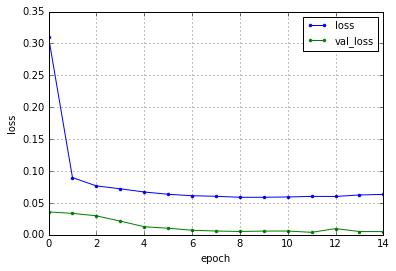

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.3570 - val_loss: 0.0367
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1119 - val_loss: 0.0349
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0960 - val_loss: 0.0310
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0910 - val_loss: 0.0228
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0856 - val_loss: 0.0138
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0816 - val_loss: 0.0091
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0794 - val_loss: 0.0072
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0794 - val_loss: 0.0109
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0795 - val_loss: 0.0043
Epoch 10/50
15921/15921 [==============================] - 13s - loss: 0.0810 - val_lo

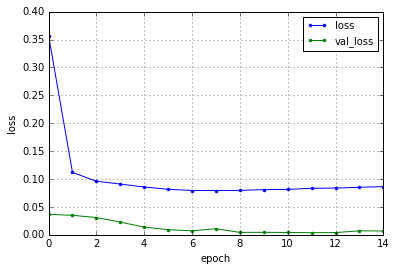

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.5045 - val_loss: 0.0353
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1988 - val_loss: 0.0327
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.1681 - val_loss: 0.0286
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.1550 - val_loss: 0.0202
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.1514 - val_loss: 0.0149
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.1518 - val_loss: 0.0142
Epoch 7/50
15921/15921 [==============================] - 13s - loss: 0.1527 - val_loss: 0.0453
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.1550 - val_loss: 0.0096
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.1605 - val_loss: 0.0232
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.1665 - val_lo

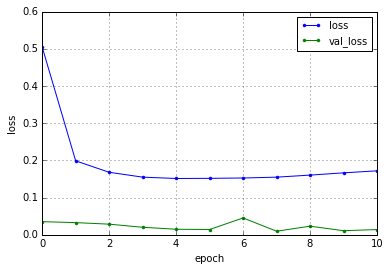

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.6162 - val_loss: 0.0324
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.3145 - val_loss: 0.0268
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.3078 - val_loss: 0.0227
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.3123 - val_loss: 0.0227
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.3173 - val_loss: 0.0170
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.3264 - val_loss: 0.0205
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.3362 - val_loss: 0.0130
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.3529 - val_loss: 0.0118
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.3636 - val_loss: 0.0152
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.3810 - val_lo

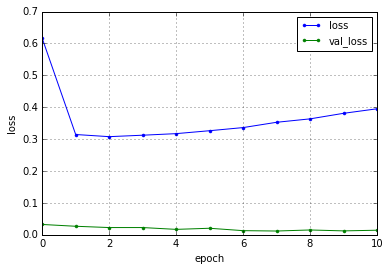

L1 parameter is 0.7
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 13s - loss: 0.2911 - val_loss: 0.0379
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0745 - val_loss: 0.0389
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0611 - val_loss: 0.0361
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0563 - val_loss: 0.0337
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0540 - val_loss: 0.0282
Epoch 6/50
15921/15921 [==============================] - 13s - loss: 0.0505 - val_loss: 0.0203
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0465 - val_loss: 0.0137
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0430 - val_loss: 0.0097
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0403 - val_loss: 0.0077
Epoch 10/50
15921/15921 [==============================] - 15s - l

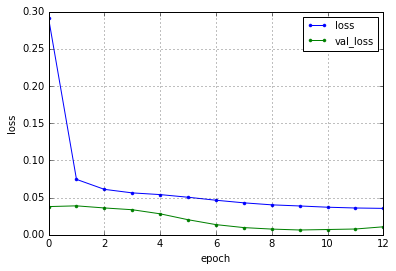

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.3235 - val_loss: 0.0375
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.1014 - val_loss: 0.0369
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0861 - val_loss: 0.0352
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0791 - val_loss: 0.0342
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0750 - val_loss: 0.0312
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0721 - val_loss: 0.0264
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0678 - val_loss: 0.0211
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0645 - val_loss: 0.0164
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0605 - val_loss: 0.0135
Epoch 10/50
15921/15921 [==============================] - 13s - loss: 0.0578 - val_lo

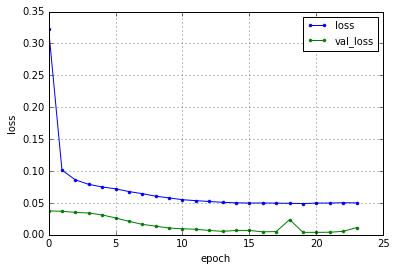

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 13s - loss: 0.3693 - val_loss: 0.0367
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1354 - val_loss: 0.0359
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1145 - val_loss: 0.0347
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0992 - val_loss: 0.0334
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0929 - val_loss: 0.0300
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0888 - val_loss: 0.0249
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0842 - val_loss: 0.0233
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0804 - val_loss: 0.0131
Epoch 9/50
15921/15921 [==============================] - 12s - loss: 0.0781 - val_loss: 0.0112
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0766 - val_lo

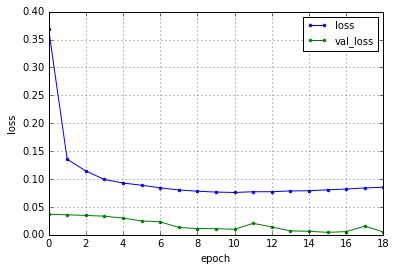

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.4716 - val_loss: 0.0370
Epoch 2/50
15921/15921 [==============================] - 13s - loss: 0.1764 - val_loss: 0.0378
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.1534 - val_loss: 0.0352
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.1386 - val_loss: 0.0354
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.1287 - val_loss: 0.0324
Epoch 6/50
15921/15921 [==============================] - 13s - loss: 0.1222 - val_loss: 0.0298
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.1154 - val_loss: 0.0208
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.1104 - val_loss: 0.0179
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.1068 - val_loss: 0.0178
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.1065 - val_lo

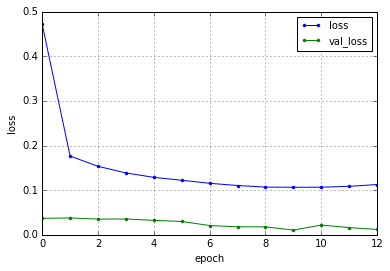

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.5849 - val_loss: 0.0379
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.2292 - val_loss: 0.0350
Epoch 3/50
15921/15921 [==============================] - 13s - loss: 0.2339 - val_loss: 0.0320
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.2321 - val_loss: 0.0277
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.2266 - val_loss: 0.0237
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.2201 - val_loss: 0.0184
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.2137 - val_loss: 0.0142
Epoch 8/50
15921/15921 [==============================] - 13s - loss: 0.2181 - val_loss: 0.0153
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.2210 - val_loss: 0.0113
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.2315 - val_lo

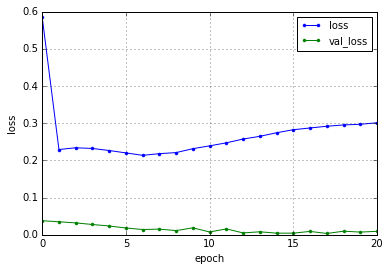

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.7678 - val_loss: 0.0354
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.4401 - val_loss: 0.0340
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.4683 - val_loss: 0.0509
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.4847 - val_loss: 0.0309
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.4829 - val_loss: 0.0229
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.4834 - val_loss: 0.0337
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.4880 - val_loss: 0.0213
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.4980 - val_loss: 0.0193
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.5156 - val_loss: 0.0132
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.5381 - val_lo

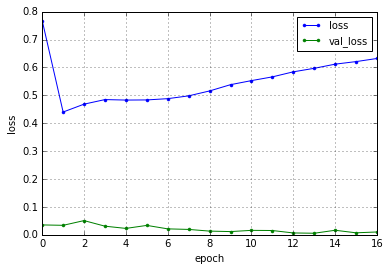

L1 parameter is 0.9
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.2978 - val_loss: 0.0389
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.0925 - val_loss: 0.0381
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.0755 - val_loss: 0.0376
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.0652 - val_loss: 0.0379
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0639 - val_loss: 0.0373
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0626 - val_loss: 0.0364
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0611 - val_loss: 0.0360
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0587 - val_loss: 0.0327
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0553 - val_loss: 0.0291
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.052

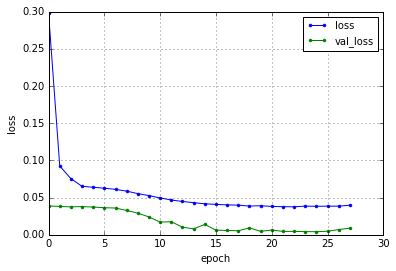

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.4226 - val_loss: 0.0373
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1241 - val_loss: 0.0374
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1022 - val_loss: 0.0356
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.0927 - val_loss: 0.0361
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0889 - val_loss: 0.0337
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0866 - val_loss: 0.0322
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0835 - val_loss: 0.0283
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0801 - val_loss: 0.0247
Epoch 9/50
15921/15921 [==============================] - 8s - loss: 0.0770 - val_loss: 0.0197
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.0743 - val_loss: 0.0163

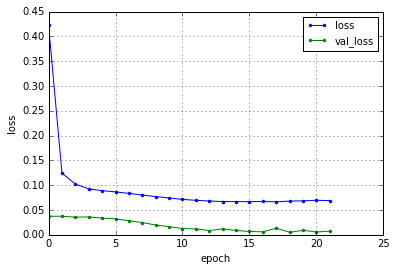

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.4196 - val_loss: 0.0358
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1494 - val_loss: 0.0366
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.1282 - val_loss: 0.0347
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1198 - val_loss: 0.0350
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1147 - val_loss: 0.0300
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1105 - val_loss: 0.0256
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1061 - val_loss: 0.0177
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1016 - val_loss: 0.0141
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.1005 - val_loss: 0.0107
Epoch 10/50
15921/15921 [==============================] - 10s - loss: 0.0998 - val_loss: 0.010

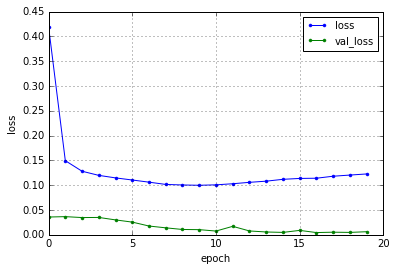

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.5239 - val_loss: 0.0389
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.1983 - val_loss: 0.0384
Epoch 3/50
15921/15921 [==============================] - 7s - loss: 0.1758 - val_loss: 0.0364
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.1626 - val_loss: 0.0362
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.1553 - val_loss: 0.0338
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.1493 - val_loss: 0.0321
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.1469 - val_loss: 0.0279
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.1414 - val_loss: 0.0255
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.1367 - val_loss: 0.0251
Epoch 10/50
15921/15921 [==============================] - 9s - loss: 0.1340 - val_loss: 0.0188

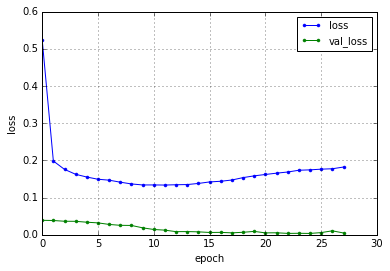

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.7328 - val_loss: 0.0366
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.3131 - val_loss: 0.0348
Epoch 3/50
15921/15921 [==============================] - 10s - loss: 0.2821 - val_loss: 0.0339
Epoch 4/50
15921/15921 [==============================] - 10s - loss: 0.2787 - val_loss: 0.0314
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.2757 - val_loss: 0.0281
Epoch 6/50
15921/15921 [==============================] - 10s - loss: 0.2742 - val_loss: 0.0247
Epoch 7/50
15921/15921 [==============================] - 10s - loss: 0.2762 - val_loss: 0.0245
Epoch 8/50
15921/15921 [==============================] - 10s - loss: 0.2760 - val_loss: 0.0176
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.2807 - val_loss: 0.0141
Epoch 10/50
15921/15921 [==============================] - 10s - loss: 0.2897 - val_loss: 

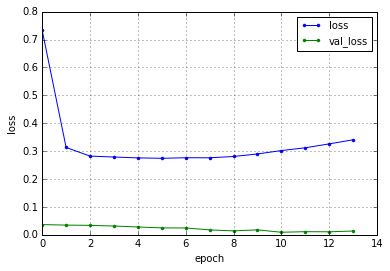

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 1.0349 - val_loss: 0.0349
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.5736 - val_loss: 0.0349
Epoch 3/50
15921/15921 [==============================] - 9s - loss: 0.6211 - val_loss: 0.0311
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.6502 - val_loss: 0.0341
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.6627 - val_loss: 0.0343
Epoch 6/50
15921/15921 [==============================] - 7s - loss: 0.6738 - val_loss: 0.0259
Epoch 7/50
15921/15921 [==============================] - 10s - loss: 0.6884 - val_loss: 0.0299
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.6876 - val_loss: 0.0232
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.7020 - val_loss: 0.0223
Epoch 10/50
15921/15921 [==============================] - 10s - loss: 0.7117 - val_loss: 0.01

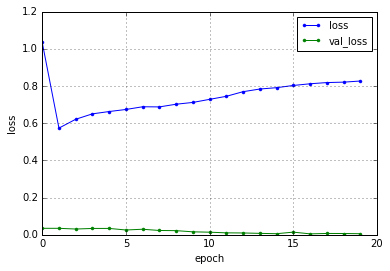

In [10]:
for pl1 in ParameterL1:
    print 'L1 parameter is '+str(pl1)
    for encoding_dim in EncodingDim:
        # define SaveFileName
        commonLabel='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'-L1='+str(pl1)
        SaveFileNameEncord=DataName+'_encoded'+commonLabel
        SaveFileNameDecord=DataName+'_decoded'+commonLabel
        SaveFileNameNet=DataName+'_net'+'_edim='+commonLabel
        SaveFileNameTrain=DataName+'_train'+commonLabel
        SaveFileNameTest=DataName+'_test'+commonLabel
        SaveFileNameGlaph=GlaphDataPath+DataName+commonLabel+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh',
                       activity_regularizer=activity_l1(pl1))(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=2)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()